In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [19]:
df = pd.read_csv("COVID-19 Cases Extract.csv")

/Users/bharadwajarya/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,7,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df.dropna(subset=['Lat'],inplace=True)

In [21]:
df = df[df['Country Region']=='US']

In [22]:
df = df[df['Province State'].isin(["Alaska","Alabama","Arkansas","Arizona","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Vermont","Washington","Wisconsin","West Virginia","Wyoming"])]

In [23]:
df

,Admin2,Location Detail,If Province Empty Country,Select Metric,Country Label,LOG(SUM([Cases])),Select Metric Swapper,Province_State Label (not US),Province_State Label (US),Admin2 Label (US),...,Long,Number of Records,People_Hospitalized_Cumulative_Count,People_Total_Tested_Count,Population_Count,Prep Flow Runtime,Province State,Select Metric Header Short,iso2,iso3
272,Autauga,Autauga,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Autauga,...,-86.644082,1,NaN,NaN,55869.0,4/25/20 07:47,Alabama,Total Cases,US,USA
273,Baldwin,Baldwin,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Baldwin,...,-87.722071,1,NaN,NaN,223234.0,4/25/20 07:47,Alabama,Total Cases,US,USA
274,Barbour,Barbour,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Barbour,...,-85.387129,1,NaN,NaN,24686.0,4/25/20 07:47,Alabama,Total Cases,US,USA
275,Bibb,Bibb,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Bibb,...,-87.125115,1,NaN,NaN,22394.0,4/25/20 07:47,Alabama,Total Cases,US,USA
276,Blount,Blount,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Blount,...,-86.567906,1,NaN,NaN,57826.0,4/25/20 07:47,Alabama,Total Cases,US,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661543,Washakie,Washakie,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Washakie,...,-107.680187,1,NaN,NaN,7805.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661545,Niobrara,Niobrara,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Niobrara,...,-104.475890,1,NaN,NaN,2356.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661547,Park,Park,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Park,...,-109.585282,1,NaN,NaN,29194.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661548,Sweetwater,Sweetwater,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Sweetwater,...,-108.882788,1,NaN,NaN,42343.0,4/25/20 07:47,Wyoming,Total Cases,US,USA


In [24]:
df.columns

Index(['Admin2', 'Location Detail', 'If Province Empty Country',
       'Select Metric', 'Country Label', 'LOG(SUM([Cases]))',
       'Select Metric Swapper', 'Province_State Label (not US)',
       'Province_State Label (US)', 'Admin2 Label (US)', 'US Unassigned?',
       'US Out of Area?', 'Cruise Ship?', 'Metric Switcher', 'Case Type 2',
       'Case Type Notes', 'Case Type', 'Cases', 'Combined_Key',
       'Province Label', 'Country Region', 'Data_Source', 'Date', 'Difference',
       'FIPS', 'If Province Empty then ""', 'LOG(Metric Switcher)', 'Lat',
       'Long', 'Number of Records', 'People_Hospitalized_Cumulative_Count',
       'People_Total_Tested_Count', 'Population_Count', 'Prep Flow Runtime',
       'Province State', 'Select Metric Header Short', 'iso2', 'iso3'],
      dtype='object')

In [25]:
columns = ['Location Detail','Admin2 Label (US)','Cruise Ship?', 'Case Type', 'Cases', 'Country Region', 'Date', 'Difference','Lat', 'Long','Province State']
removeCol_list = []
for i in df.columns:
    if i not in columns:
        removeCol_list.append(i)

removeCol_list

['Admin2',
 'If Province Empty Country',
 'Select Metric',
 'Country Label',
 'LOG(SUM([Cases]))',
 'Select Metric Swapper',
 'Province_State Label (not US)',
 'Province_State Label (US)',
 'US Unassigned?',
 'US Out of Area?',
 'Metric Switcher',
 'Case Type 2',
 'Case Type Notes',
 'Combined_Key',
 'Province Label',
 'Data_Source',
 'FIPS',
 'If Province Empty then ""',
 'LOG(Metric Switcher)',
 'Number of Records',
 'People_Hospitalized_Cumulative_Count',
 'People_Total_Tested_Count',
 'Population_Count',
 'Prep Flow Runtime',
 'Select Metric Header Short',
 'iso2',
 'iso3']

In [26]:
df1 = df.drop(removeCol_list, axis=1)

In [27]:
df1.head()

,Location Detail,Admin2 Label (US),Cruise Ship?,Case Type,Cases,Country Region,Date,Difference,Lat,Long,Province State
272,Autauga,| County: Autauga,False,Confirmed,0,US,1/22/20,0,32.539527,-86.644082,Alabama
273,Baldwin,| County: Baldwin,False,Confirmed,0,US,1/22/20,0,30.727750,-87.722071,Alabama
274,Barbour,| County: Barbour,False,Confirmed,0,US,1/22/20,0,31.868263,-85.387129,Alabama
275,Bibb,| County: Bibb,False,Confirmed,0,US,1/22/20,0,32.996421,-87.125115,Alabama
276,Blount,| County: Blount,False,Confirmed,0,US,1/22/20,0,33.982109,-86.567906,Alabama


In [28]:
df1.shape

(592012, 11)

In [29]:
df.shape


(592012, 38)

In [30]:
df

,Admin2,Location Detail,If Province Empty Country,Select Metric,Country Label,LOG(SUM([Cases])),Select Metric Swapper,Province_State Label (not US),Province_State Label (US),Admin2 Label (US),...,Long,Number of Records,People_Hospitalized_Cumulative_Count,People_Total_Tested_Count,Population_Count,Prep Flow Runtime,Province State,Select Metric Header Short,iso2,iso3
272,Autauga,Autauga,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Autauga,...,-86.644082,1,NaN,NaN,55869.0,4/25/20 07:47,Alabama,Total Cases,US,USA
273,Baldwin,Baldwin,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Baldwin,...,-87.722071,1,NaN,NaN,223234.0,4/25/20 07:47,Alabama,Total Cases,US,USA
274,Barbour,Barbour,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Barbour,...,-85.387129,1,NaN,NaN,24686.0,4/25/20 07:47,Alabama,Total Cases,US,USA
275,Bibb,Bibb,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Bibb,...,-87.125115,1,NaN,NaN,22394.0,4/25/20 07:47,Alabama,Total Cases,US,USA
276,Blount,Blount,Alabama,0,Country: US,NaN,True,NaN,Alabama,| County: Blount,...,-86.567906,1,NaN,NaN,57826.0,4/25/20 07:47,Alabama,Total Cases,US,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661543,Washakie,Washakie,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Washakie,...,-107.680187,1,NaN,NaN,7805.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661545,Niobrara,Niobrara,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Niobrara,...,-104.475890,1,NaN,NaN,2356.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661547,Park,Park,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Park,...,-109.585282,1,NaN,NaN,29194.0,4/25/20 07:47,Wyoming,Total Cases,US,USA
661548,Sweetwater,Sweetwater,Wyoming,0,Country: US,NaN,True,NaN,Wyoming,| County: Sweetwater,...,-108.882788,1,NaN,NaN,42343.0,4/25/20 07:47,Wyoming,Total Cases,US,USA


In [31]:
df1 = df1.rename(columns={'Location Detail':'location','Admin2 Label (US)':'county','Cruise Ship?':'ship', 'Case Type':'case_type','Cases': 'cases','Country Region':'country', 'Date':'date', 'Difference':'difference','Lat':'latitude','Long':'longitude','Province State':'state'})
df1

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,Autauga,| County: Autauga,False,Confirmed,0,US,1/22/20,0,32.539527,-86.644082,Alabama
273,Baldwin,| County: Baldwin,False,Confirmed,0,US,1/22/20,0,30.727750,-87.722071,Alabama
274,Barbour,| County: Barbour,False,Confirmed,0,US,1/22/20,0,31.868263,-85.387129,Alabama
275,Bibb,| County: Bibb,False,Confirmed,0,US,1/22/20,0,32.996421,-87.125115,Alabama
276,Blount,| County: Blount,False,Confirmed,0,US,1/22/20,0,33.982109,-86.567906,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
661543,Washakie,| County: Washakie,False,Deaths,0,US,4/23/20,0,43.904516,-107.680187,Wyoming
661545,Niobrara,| County: Niobrara,False,Deaths,0,US,4/24/20,0,43.056077,-104.475890,Wyoming
661547,Park,| County: Park,False,Deaths,0,US,4/24/20,0,44.521575,-109.585282,Wyoming
661548,Sweetwater,| County: Sweetwater,False,Deaths,0,US,4/24/20,0,41.659439,-108.882788,Wyoming


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592012 entries, 272 to 661549
Data columns (total 11 columns):
location      592012 non-null object
county        592012 non-null object
ship          592012 non-null bool
case_type     592012 non-null object
cases         592012 non-null int64
country       592012 non-null object
date          592012 non-null object
difference    592012 non-null int64
latitude      592012 non-null float64
longitude     592012 non-null float64
state         592012 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 50.2+ MB


In [33]:
df1['county'] = df1['county'].map(lambda x: str(x).lstrip('| County: '))

In [34]:
df1['county'].unique()

array(['Autauga', 'Baldwin', 'Barbour', ..., 'Brazoria', 'Alexandria',
       'Hawkins'], dtype=object)

In [35]:
#df1.to_csv('kbs_covid_.csv',header=True, index=False)

In [36]:
# Categorical boolean mask
categorical_feature_mask = df1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df1.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [37]:
print(categorical_feature_mask.to_list())
df1.columns

[True, True, False, True, False, True, True, False, False, False, True]


Index(['location', 'county', 'ship', 'case_type', 'cases', 'country', 'date',
       'difference', 'latitude', 'longitude', 'state'],
      dtype='object')

In [38]:
df_unfactorize = df1.copy()

In [39]:
df_unfactorize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592012 entries, 272 to 661549
Data columns (total 11 columns):
location      592012 non-null object
county        592012 non-null object
ship          592012 non-null bool
case_type     592012 non-null object
cases         592012 non-null int64
country       592012 non-null object
date          592012 non-null object
difference    592012 non-null int64
latitude      592012 non-null float64
longitude     592012 non-null float64
state         592012 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 50.2+ MB


In [40]:
cols = ['location', 'county','ship','case_type','country','state']
df1[cols]=df1[cols].apply(lambda x: pd.factorize(x)[0])

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592012 entries, 272 to 661549
Data columns (total 11 columns):
location      592012 non-null int64
county        592012 non-null int64
ship          592012 non-null int64
case_type     592012 non-null int64
cases         592012 non-null int64
country       592012 non-null int64
date          592012 non-null object
difference    592012 non-null int64
latitude      592012 non-null float64
longitude     592012 non-null float64
state         592012 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 54.2+ MB


In [42]:
df1['difference'].fillna(0, inplace=True)

df_unfactorize['difference'].fillna(0, inplace=True)

In [43]:
df1.date = pd.to_datetime(df1.date)

df_unfactorize.date = pd.to_datetime(df1.date)

df1.head()

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,0,0,0,0,0,0,2020-01-22,0,32.539527,-86.644082,0
273,1,1,0,0,0,0,2020-01-22,0,30.727750,-87.722071,0
274,2,2,0,0,0,0,2020-01-22,0,31.868263,-85.387129,0
275,3,3,0,0,0,0,2020-01-22,0,32.996421,-87.125115,0
276,4,4,0,0,0,0,2020-01-22,0,33.982109,-86.567906,0


In [44]:
df_unfactorize.head()

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,Autauga,Autauga,False,Confirmed,0,US,2020-01-22,0,32.539527,-86.644082,Alabama
273,Baldwin,Baldwin,False,Confirmed,0,US,2020-01-22,0,30.727750,-87.722071,Alabama
274,Barbour,Barbour,False,Confirmed,0,US,2020-01-22,0,31.868263,-85.387129,Alabama
275,Bibb,Bibb,False,Confirmed,0,US,2020-01-22,0,32.996421,-87.125115,Alabama
276,Blount,Blount,False,Confirmed,0,US,2020-01-22,0,33.982109,-86.567906,Alabama


In [45]:
df1.isnull().sum()

location      0
county        0
ship          0
case_type     0
cases         0
country       0
date          0
difference    0
latitude      0
longitude     0
state         0
dtype: int64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592012 entries, 272 to 661549
Data columns (total 11 columns):
location      592012 non-null int64
county        592012 non-null int64
ship          592012 non-null int64
case_type     592012 non-null int64
cases         592012 non-null int64
country       592012 non-null int64
date          592012 non-null datetime64[ns]
difference    592012 non-null int64
latitude      592012 non-null float64
longitude     592012 non-null float64
state         592012 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 54.2 MB


In [47]:
df1

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,0,0,0,0,0,0,2020-01-22,0,32.539527,-86.644082,0
273,1,1,0,0,0,0,2020-01-22,0,30.727750,-87.722071,0
274,2,2,0,0,0,0,2020-01-22,0,31.868263,-85.387129,0
275,3,3,0,0,0,0,2020-01-22,0,32.996421,-87.125115,0
276,4,4,0,0,0,0,2020-01-22,0,33.982109,-86.567906,0
...,...,...,...,...,...,...,...,...,...,...,...
661543,1084,1083,0,1,0,0,2020-04-23,0,43.904516,-107.680187,49
661545,1379,1377,0,1,0,0,2020-04-24,0,43.056077,-104.475890,49
661547,266,266,0,1,0,0,2020-04-24,0,44.521575,-109.585282,49
661548,1380,1378,0,1,0,0,2020-04-24,0,41.659439,-108.882788,49


In [48]:
df1.to_csv('kbs_covid_latest.csv',header=True, index=False)

In [49]:
df1

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,0,0,0,0,0,0,2020-01-22,0,32.539527,-86.644082,0
273,1,1,0,0,0,0,2020-01-22,0,30.727750,-87.722071,0
274,2,2,0,0,0,0,2020-01-22,0,31.868263,-85.387129,0
275,3,3,0,0,0,0,2020-01-22,0,32.996421,-87.125115,0
276,4,4,0,0,0,0,2020-01-22,0,33.982109,-86.567906,0
...,...,...,...,...,...,...,...,...,...,...,...
661543,1084,1083,0,1,0,0,2020-04-23,0,43.904516,-107.680187,49
661545,1379,1377,0,1,0,0,2020-04-24,0,43.056077,-104.475890,49
661547,266,266,0,1,0,0,2020-04-24,0,44.521575,-109.585282,49
661548,1380,1378,0,1,0,0,2020-04-24,0,41.659439,-108.882788,49


<h1>AQI logic</h1>

In [50]:
df_aqi = pd.read_csv("countries.csv")
df_aqi

,State,County,Date,Ozone
0,Alaska,Anchorage,2020/1/24,-999.0
1,Alaska,Eagle River,2020/1/24,-999.0
2,Alaska,Bethel,2020/1/24,-999.0
3,Alaska,Fairbanks,2020/1/24,-999.0
4,Alaska,North Pole,2020/1/24,-999.0
...,...,...,...,...
78592,Wyoming,Wamsutter,2020/4/26,39.0
78593,Wyoming,Moxa Arch,2020/4/26,41.0
78594,Wyoming,Jackson,2020/4/26,-999.0
78595,Wyoming,Evanston,2020/4/26,43.0


In [51]:
df_aqi_update = df_aqi[['State','Date','Ozone']]
df_aqi_update = df_aqi_update.rename(columns={'State':'state','Date':'date','Ozone':'ozone'})

df_aqi_update['ozone'].mask(df_aqi_update['ozone'] == -999.0, 0, inplace=True)
df_aqi_update.ozone.unique()
df_aqi_update = df_aqi_update.fillna(0)

df_aqi_update.drop(df_aqi_update[df_aqi_update['date'] == 0 ].index, inplace = True)

df_aqi_update.date = pd.to_datetime(df_aqi_update.date)

# df_aqi_update = df_aqi_update.groupby(['state','date']).agg({'ozone': {'avg': np.mean}})

# df_aqi_update = df_aqi_update.groupby('date')['ozone'].mean().reset_index()
df_aqi_update = df_aqi_update.groupby(['state', 'date'])['ozone'].mean().reset_index()

df_aqi_update = df_aqi_update.replace(to_replace ='[_]', value = ' ', regex = True)

df_aqi_update

,state,date,ozone
0,Alabama,2020-01-24,8.000000
1,Alabama,2020-01-25,11.000000
2,Alabama,2020-01-26,8.250000
3,Alabama,2020-01-27,7.750000
4,Alabama,2020-01-28,0.000000
...,...,...,...
4883,Wyoming,2020-04-22,34.037037
4884,Wyoming,2020-04-23,31.666667
4885,Wyoming,2020-04-24,34.259259
4886,Wyoming,2020-04-25,36.851852


In [52]:
# df_combined = pd.concat(df_unfactorize,df_aqi_update)

In [53]:
df_combined = pd.merge(df_unfactorize, df_aqi_update, how='left', left_on=['state','date'], right_on=['state','date'])

In [54]:
df_combined

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state,ozone
0,Autauga,Autauga,False,Confirmed,0,US,2020-01-22,0,32.539527,-86.644082,Alabama,NaN
1,Baldwin,Baldwin,False,Confirmed,0,US,2020-01-22,0,30.727750,-87.722071,Alabama,NaN
2,Barbour,Barbour,False,Confirmed,0,US,2020-01-22,0,31.868263,-85.387129,Alabama,NaN
3,Bibb,Bibb,False,Confirmed,0,US,2020-01-22,0,32.996421,-87.125115,Alabama,NaN
4,Blount,Blount,False,Confirmed,0,US,2020-01-22,0,33.982109,-86.567906,Alabama,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
592007,Washakie,Washakie,False,Deaths,0,US,2020-04-23,0,43.904516,-107.680187,Wyoming,31.666667
592008,Niobrara,Niobrara,False,Deaths,0,US,2020-04-24,0,43.056077,-104.475890,Wyoming,34.259259
592009,Park,Park,False,Deaths,0,US,2020-04-24,0,44.521575,-109.585282,Wyoming,34.259259
592010,Sweetwater,Sweetwater,False,Deaths,0,US,2020-04-24,0,41.659439,-108.882788,Wyoming,34.259259


In [55]:
df_unfactorize

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
272,Autauga,Autauga,False,Confirmed,0,US,2020-01-22,0,32.539527,-86.644082,Alabama
273,Baldwin,Baldwin,False,Confirmed,0,US,2020-01-22,0,30.727750,-87.722071,Alabama
274,Barbour,Barbour,False,Confirmed,0,US,2020-01-22,0,31.868263,-85.387129,Alabama
275,Bibb,Bibb,False,Confirmed,0,US,2020-01-22,0,32.996421,-87.125115,Alabama
276,Blount,Blount,False,Confirmed,0,US,2020-01-22,0,33.982109,-86.567906,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
661543,Washakie,Washakie,False,Deaths,0,US,2020-04-23,0,43.904516,-107.680187,Wyoming
661545,Niobrara,Niobrara,False,Deaths,0,US,2020-04-24,0,43.056077,-104.475890,Wyoming
661547,Park,Park,False,Deaths,0,US,2020-04-24,0,44.521575,-109.585282,Wyoming
661548,Sweetwater,Sweetwater,False,Deaths,0,US,2020-04-24,0,41.659439,-108.882788,Wyoming


In [56]:
df_combined.to_csv('combined.csv',header=True, index=False)

In [57]:
df_aqi_update.to_csv('aqi_update.csv',header=True, index=False)

In [58]:
df_combined = pd.read_csv('combined.csv')

In [59]:
df_combined = df_combined.drop(['county','ship','country'], axis=1)

In [60]:
df_combined.head()

,location,case_type,cases,date,difference,latitude,longitude,state,ozone
0,Autauga,Confirmed,0,2020-01-22,0,32.539527,-86.644082,Alabama,NaN
1,Baldwin,Confirmed,0,2020-01-22,0,30.727750,-87.722071,Alabama,NaN
2,Barbour,Confirmed,0,2020-01-22,0,31.868263,-85.387129,Alabama,NaN
3,Bibb,Confirmed,0,2020-01-22,0,32.996421,-87.125115,Alabama,NaN
4,Blount,Confirmed,0,2020-01-22,0,33.982109,-86.567906,Alabama,NaN


In [61]:
df_combined.date = pd.to_datetime(df_combined.date)

df_combined.dtypes

location              object
case_type             object
cases                  int64
date          datetime64[ns]
difference             int64
latitude             float64
longitude            float64
state                 object
ozone                float64
dtype: object

In [62]:
cols = ['location', 'case_type','state']
df_combined[cols]=df_combined[cols].apply(lambda x: pd.factorize(x)[0])

In [63]:
df_combined.head()

,location,case_type,cases,date,difference,latitude,longitude,state,ozone
0,0,0,0,2020-01-22,0,32.539527,-86.644082,0,NaN
1,1,0,0,2020-01-22,0,30.727750,-87.722071,0,NaN
2,2,0,0,2020-01-22,0,31.868263,-85.387129,0,NaN
3,3,0,0,2020-01-22,0,32.996421,-87.125115,0,NaN
4,4,0,0,2020-01-22,0,33.982109,-86.567906,0,NaN


In [64]:
df_combined.ozone.describe()

count    579416.000000
mean         26.157336
std          13.062571
min           0.000000
25%          16.916667
50%          28.294118
75%          36.000000
max         105.000000
Name: ozone, dtype: float64

In [65]:
# df_unfactorize['difference'].fillna(0, inplace=True)
# df_unfactorize['difference'].fillna(28.294118, inplace=True)

In [66]:
df_combined.shape

(592012, 9)

In [67]:
df_combined.drop(df_combined[df_combined['date'] == '2020-01-22' ].index, inplace = True)

In [68]:
df_combined.drop(df_combined[df_combined['date'] == '2020-01-23' ].index, inplace = True)

In [69]:
df_combined.shape

(579416, 9)

In [70]:
df_combined.head()

,location,case_type,cases,date,difference,latitude,longitude,state,ozone
63,63,1,0,2020-03-19,0,39.215877,-91.842427,2,30.0
64,64,1,0,2020-03-19,0,38.252713,-94.341132,2,30.0
65,65,1,0,2020-03-19,0,37.324491,-90.027253,2,30.0
66,66,1,0,2020-03-19,0,36.971178,-93.185371,2,30.0
67,67,1,0,2020-03-19,0,38.504557,-92.278602,2,30.0


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24e46fd0>,
      dtype=object)

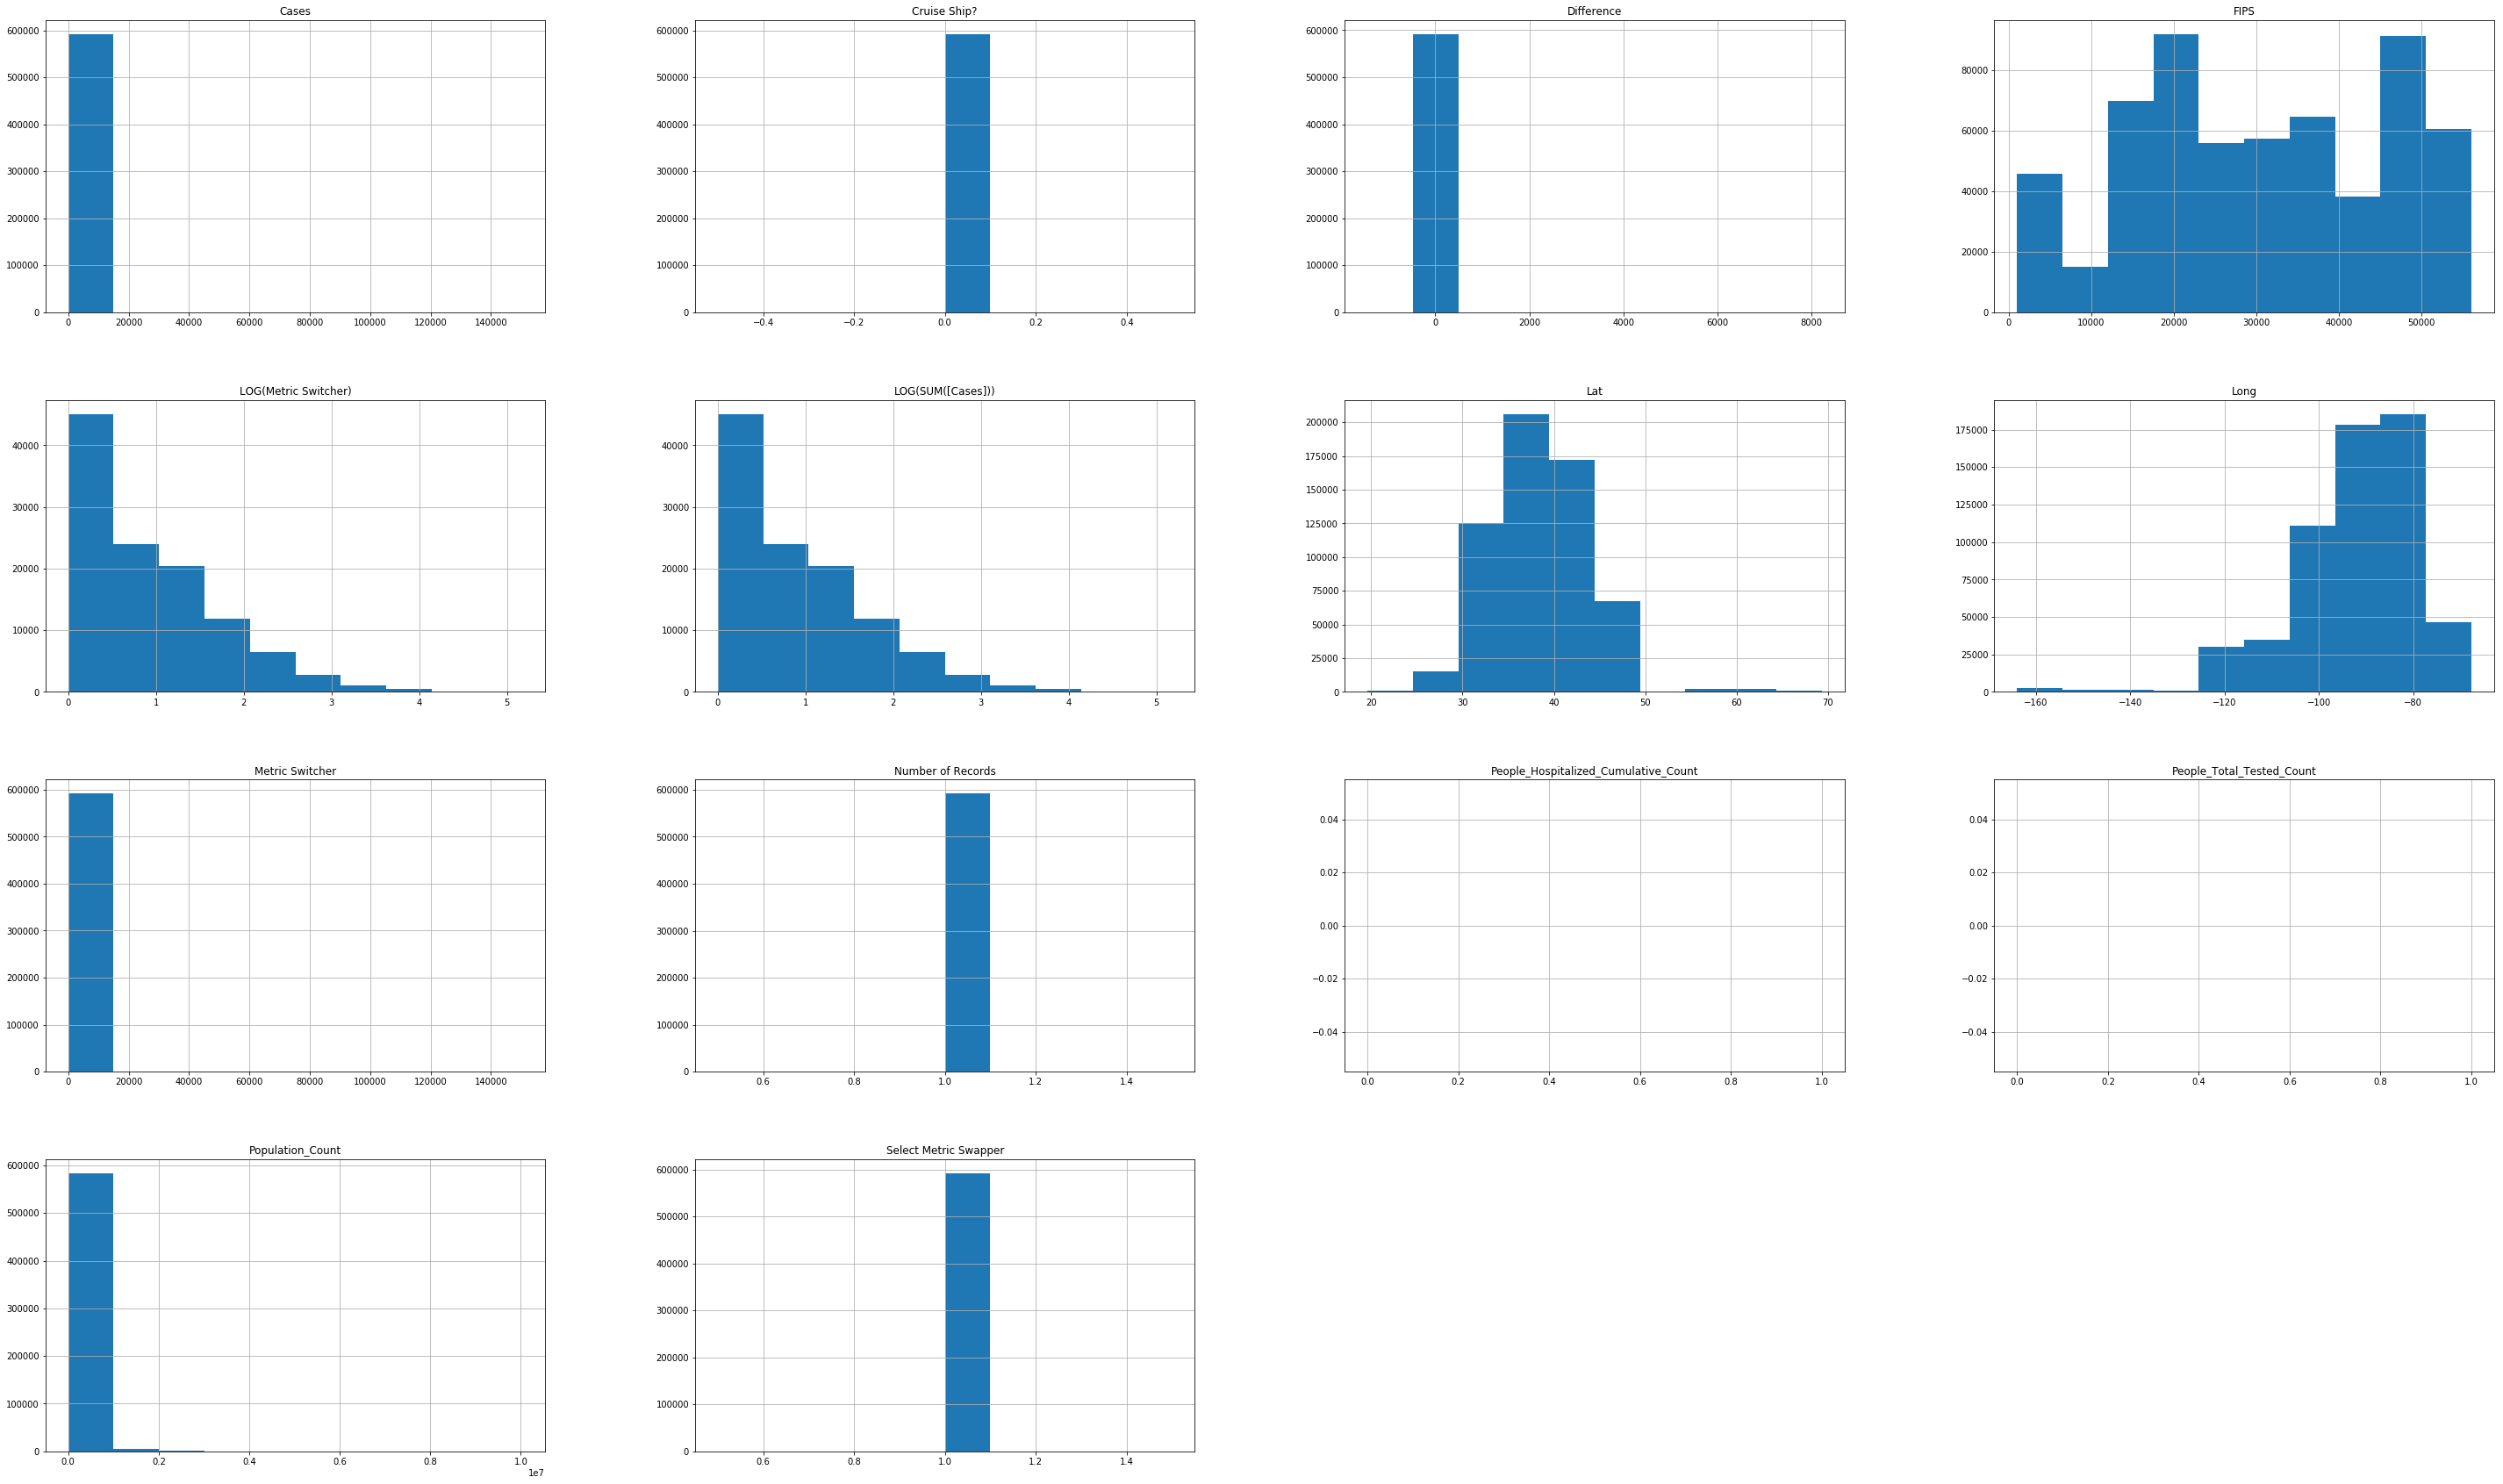

In [71]:
df.hist(figsize=(50, 30))

In [76]:
# df_combined.plot.scatter('date', 'cases')
grouped_df = df_combined.groupby('date',as_index=False).cases.sum()
grouped_df

,date,cases
0,2020-01-24,2
1,2020-01-25,2
2,2020-01-26,5
3,2020-01-27,5
4,2020-01-28,5
...,...,...
87,2020-04-20,815377
88,2020-04-21,841791
89,2020-04-22,874316
90,2020-04-23,906265


In [78]:
grouped_df.dtypes

date     datetime64[ns]
cases             int64
dtype: object

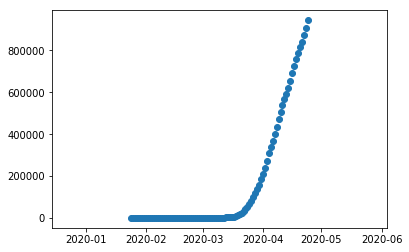

In [96]:
plt.scatter(grouped_df['date'],grouped_df['cases'])

In [97]:
bins = [0,51,101,150]
df_combined['binned'] = pd.cut(df_combined['ozone'], bins,labels=["low", "medium", "high"])

In [101]:
df_combined['binned'].fillna('low', inplace=True)

In [102]:
df_combined['binned'].unique()

[low, medium, high]
Categories (3, object): [low < medium < high]

In [105]:
grouped_ozone = df_combined.groupby('date',as_index=False).ozone.mean()
grouped_ozone

,date,ozone
0,2020-01-24,14.322187
1,2020-01-25,15.505768
2,2020-01-26,15.650239
3,2020-01-27,15.911116
4,2020-01-28,15.585784
...,...,...
87,2020-04-20,37.785037
88,2020-04-21,37.954115
89,2020-04-22,35.033382
90,2020-04-23,34.563044


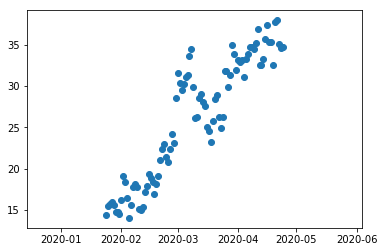

In [106]:
plt.scatter(grouped_ozone['date'],grouped_ozone['ozone'])

In [107]:
df_combined.drop(['ozone'],inplace=True,axis=1)
df_combined.head()

,location,case_type,cases,date,difference,latitude,longitude,state,binned
63,63,1,0,2020-03-19,0,39.215877,-91.842427,2,low
64,64,1,0,2020-03-19,0,38.252713,-94.341132,2,low
65,65,1,0,2020-03-19,0,37.324491,-90.027253,2,low
66,66,1,0,2020-03-19,0,36.971178,-93.185371,2,low
67,67,1,0,2020-03-19,0,38.504557,-92.278602,2,low


In [108]:
df_combined = df_combined.rename(columns={'binned':'aqi'})
cols=['aqi']
df_combined[cols]=df_combined[cols].apply(lambda x: pd.factorize(x)[0])
df_combined.head()

,location,case_type,cases,date,difference,latitude,longitude,state,aqi
63,63,1,0,2020-03-19,0,39.215877,-91.842427,2,0
64,64,1,0,2020-03-19,0,38.252713,-94.341132,2,0
65,65,1,0,2020-03-19,0,37.324491,-90.027253,2,0
66,66,1,0,2020-03-19,0,36.971178,-93.185371,2,0
67,67,1,0,2020-03-19,0,38.504557,-92.278602,2,0


In [109]:
from sklearn.model_selection import train_test_split

y = df_combined['cases']
df_combined.pop('cases')


63        0
64        0
65        0
66        0
67        0
         ..
592007    0
592008    0
592009    0
592010    0
592011    0
Name: cases, Length: 579416, dtype: int64

In [110]:
import time
import datetime

def unixTime(t):
    
    
    d = datetime.date(t.year,t.month,t.day)
    unixtimestamp = time.mktime(d.timetuple())
    return unixtimestamp

df_combined['date'] = df_combined['date'].map(lambda x: unixTime(x))
df_combined.head()

,location,case_type,date,difference,latitude,longitude,state,aqi
63,63,1,1.584590e+09,0,39.215877,-91.842427,2,0
64,64,1,1.584590e+09,0,38.252713,-94.341132,2,0
65,65,1,1.584590e+09,0,37.324491,-90.027253,2,0
66,66,1,1.584590e+09,0,36.971178,-93.185371,2,0
67,67,1,1.584590e+09,0,38.504557,-92.278602,2,0


In [111]:
X = df_combined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6492265416883249

In [113]:
y_pred = reg.predict(X_test)

In [114]:
y_test = y_test.values.reshape(-1,1)

In [115]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data

,Actual,Predicted
0,0,-3.264597
1,116,56.042748
2,1,3.890438
3,1,6.672663
4,3,22.037709
...,...,...
191203,1,5.348062
191204,0,0.320210
191205,0,-2.882879
191206,0,-0.373056


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(random_state=0, n_estimators=100)
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)

In [120]:
print('MSE:',mean_squared_error(y_test,adaboost.predict(X_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 2040874.1432065824
RMSE: 1428.591664264699
